In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Các bước tiền xử lý dữ liệu từ 5 bộ data thu thập từ [IMF](https://climatedata.imf.org/pages/climatechange-data ) (*Annual Surface Temperature Change*, *Atmospheric CO₂ Concentrations*, *Change in Mean Sea Levels*, *Climate-related Disasters Frequency*, *Forest and Carbon*):
* Lọc dữ liệu các quốc gia Châu Á, thống nhất tên nước.
* Kiểm tra tính đầy đủ của các chỉ số trong từng bộ.
* Lọc lại các dữ liệu cần thiết cho quá trình phân tích về sau.
* Kiểm tra và lọc dữ liệu theo năm.
* Gộp lại thành 1 bộ dữ liệu duy nhất cho mô hình.

## 51 quốc gia châu Á

In [2]:
# Đọc bộ dữ liệu các nước châu Á
asian = pd.read_csv('../data/raw_data/asian_countries.csv')
asian

,Country,ISO3
0,Afghanistan,AFG
1,Armenia,ARM
2,Azerbaijan,AZE
3,Bahrain,BHR
4,Bangladesh,BGD
5,Bhutan,BTN
6,Brunei Darussalam,BRN
7,Cambodia,KHM
8,China,CHN
9,Cyprus,CYP


In [3]:
# Đọc các bộ dữ liệu ClimateChange
ast = pd.read_csv('../data/raw_data/annual_surface_temperature_change.csv') #Annual Surface Temperature Change
fac = pd.read_csv('../data/raw_data/forest_and_carbon.csv') #Forest and Carbon
cdf = pd.read_csv('../data/raw_data/physical_risks_climate_related_disasters_frequency.csv') #Physical Risks: Climate-Related Disasters Frequency
msl = pd.read_csv('../data/raw_data/change_in_mean_sea_levels.csv') #Change in Mean Sea Levels
co2 = pd.read_csv('../data/raw_data/atmospheri_ CO₂_concentrations.csv') #Atmospheric CO₂ Concentrations

## Annual Surface Temperature Change

In [4]:
asian_ast = pd.merge(ast, asian, on='ISO3')
asian_ast.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', 'Country_y'],
      dtype='object')

In [5]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_ast['Country_x'] = asian_ast['Country_y']
asian_ast = asian_ast.rename(columns={"Country_x": "Country"})
asian_ast = asian_ast.drop(['ObjectId', 'Country_y', 'ISO2', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor'], axis=1, errors='ignore')

In [6]:
def visualize_missing_values(df):
    year_columns = [col for col in df.columns if col.isdigit()]
    missing_values = df[year_columns].isnull().sum()
    
    # Plot the missing values
    plt.figure(figsize=(14,8))
    plt.bar(missing_values.index, missing_values.values, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values Over the Years')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def visualize_missing_by_country(df):
    year_columns = [col for col in df.columns if col.isdigit()]
    country_year_data = df[['Country'] + year_columns]
    missing_data = country_year_data.set_index('Country').isnull().astype(int)
    
    # Plot the heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(missing_data, cmap='YlGnBu', cbar_kws={'label': 'Missing Values (1 = Missing, 0 = Present)'})
    plt.title('Missing Values by Country Over Years')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

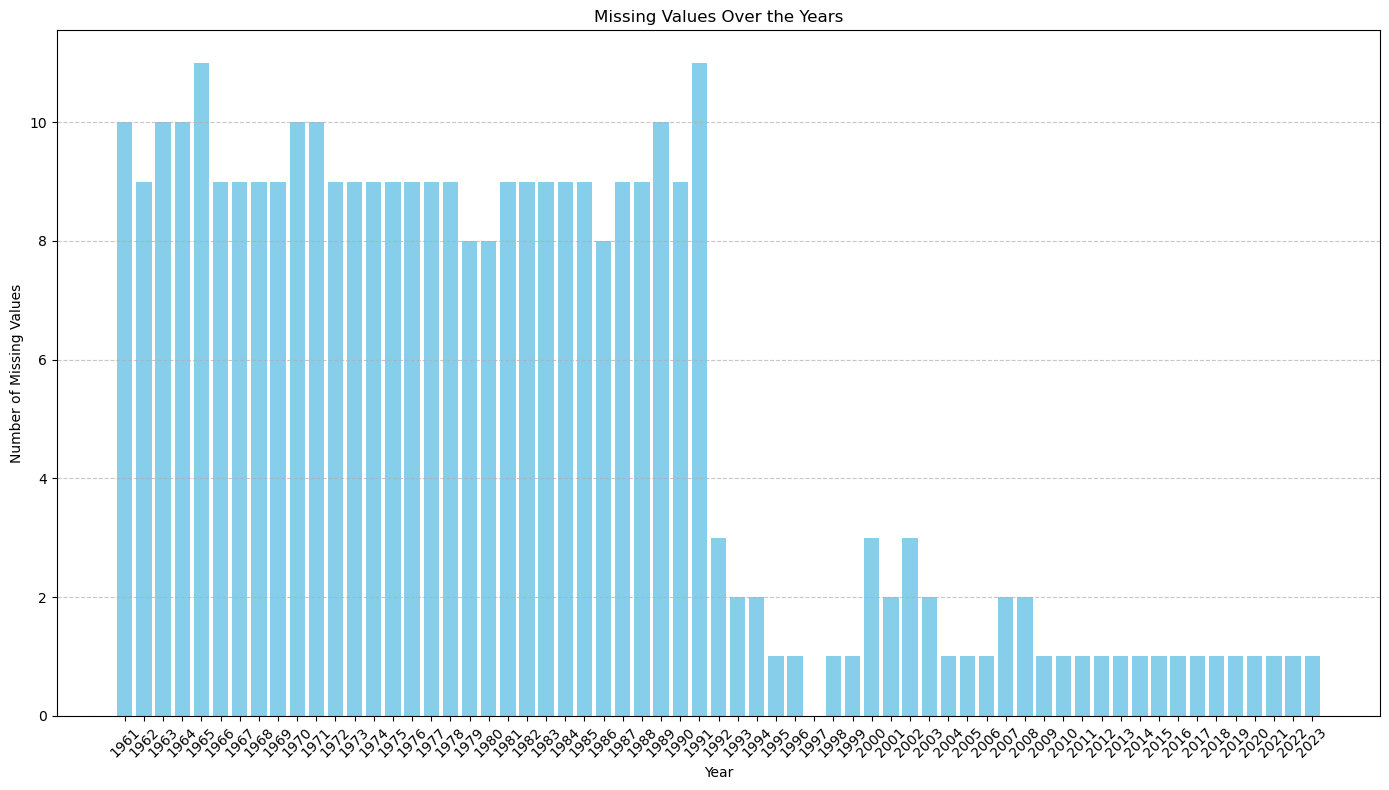

In [7]:
visualize_missing_values(asian_ast)

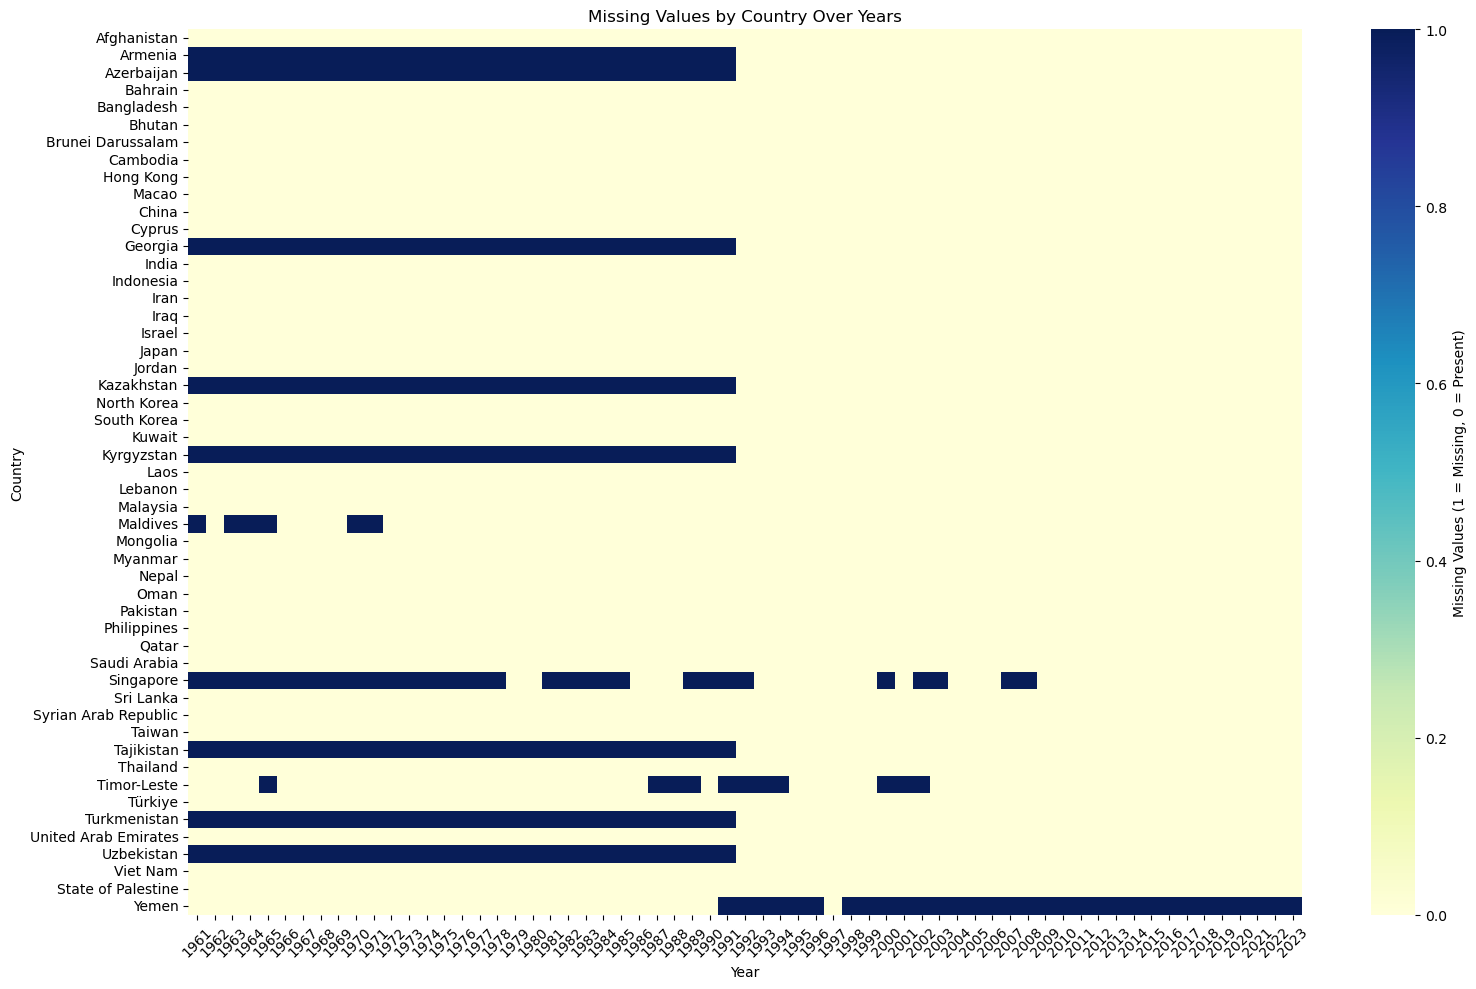

In [8]:
visualize_missing_by_country(asian_ast)

Đối với bọ dữ liệu Annual Surface Temperature Change, dễ thấy số liệu bắt đầu ổn định từ năm 2016, tuy nhiên Yemen là quốc gia duy nhất có số liệu không ổn định trong khoảng thời gian này.

## Atmospheric CO₂ Concentrations

In [9]:
co2.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.71
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.27
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.87


In [10]:
co2['Unit'].unique()

array(['Parts Per Million', 'Percent'], dtype=object)

In [11]:
monthly_CO2_df_temp = co2[co2['Indicator'] == 'Monthly Atmospheric Carbon Dioxide Concentrations'].copy()
print(monthly_CO2_df_temp['Indicator'].unique())
print(monthly_CO2_df_temp['Unit'].unique())
monthly_CO2_df_temp.head()

['Monthly Atmospheric Carbon Dioxide Concentrations']
['Parts Per Million']


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.71
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.27
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.87


In [12]:
monthly_CO2_df_temp['Date'] = monthly_CO2_df_temp['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
monthly_CO2_df_temp['Date'] = monthly_CO2_df_temp['Date'].str.replace('M', '/', regex=False)
monthly_CO2_df_temp['Date'] = pd.to_datetime(monthly_CO2_df_temp['Date'], format='%Y/%m', errors='coerce')
monthly_CO2_df_temp['Year'] = monthly_CO2_df_temp['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
monthly_CO2_df_pivoted = monthly_CO2_df_temp.pivot_table(index=['Country'], columns='Year', values='Value', aggfunc='mean')
monthly_CO2_df_pivoted = monthly_CO2_df_pivoted.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = monthly_CO2_df_temp[['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
monthly_CO2_df_complete = pd.merge(additional_columns, monthly_CO2_df_pivoted, on='Country', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
monthly_CO2_df_complete['Indicator'] = 'Monthly Atmospheric Carbon Dioxide Concentrations'
monthly_CO2_df_unique = monthly_CO2_df_complete.drop_duplicates(subset=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source'])

monthly_CO2_df_unique.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,1958,1959,1960,1961,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,401.0125,404.4125,406.758333,408.715,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857


In [13]:
monthly_CO2_df_temp2 = co2[co2['Indicator'] == 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'].copy()
print(monthly_CO2_df_temp2['Indicator'].unique())
print(monthly_CO2_df_temp2['Unit'].unique())
monthly_CO2_df_temp2.head()

['Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change']
['Percent']


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
13,14,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M03,0.30
15,16,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M04,0.09
17,18,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M05,0.25
19,20,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M06,0.28
21,22,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1959M07,0.21


In [14]:
monthly_CO2_df_temp2['Date'] = monthly_CO2_df_temp2['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
monthly_CO2_df_temp2['Date'] = monthly_CO2_df_temp2['Date'].str.replace('M', '/', regex=False)
monthly_CO2_df_temp2['Date'] = pd.to_datetime(monthly_CO2_df_temp2['Date'], format='%Y/%m', errors='coerce')
monthly_CO2_df_temp2['Year'] = monthly_CO2_df_temp2['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
monthly_CO2_df_pivoted2 = monthly_CO2_df_temp2.pivot_table(index=['Country'], columns='Year', values='Value', aggfunc='mean')
monthly_CO2_df_pivoted2 = monthly_CO2_df_pivoted2.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = monthly_CO2_df_temp2[['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
monthly_CO2_df_complete2 = pd.merge(additional_columns, monthly_CO2_df_pivoted2, on='Country', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
monthly_CO2_df_complete2['Indicator'] = 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'
monthly_CO2_df_unique2 = monthly_CO2_df_complete2.drop_duplicates(subset=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source'])

monthly_CO2_df_unique2.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,1959,1960,1961,1962,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",0.234,0.2925,0.2325,0.255833,...,0.5525,0.848333,0.58,0.4825,0.7175,0.623333,0.530833,0.508333,0.608333,0.847143


In [15]:
aCO2c = pd.concat([monthly_CO2_df_unique, monthly_CO2_df_unique2], ignore_index=True)

In [16]:
aCO2c.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,1958,1959,1960,1961,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",NaN,0.234000,0.292500,0.232500,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143


In [17]:
# Tạo danh sách các quốc gia từ DataFrame `df_countries`
country_names = asian["Country"].tolist()

# Lặp qua các quốc gia và tạo một bản sao của dữ liệu Carbon ứng với từng quốc gia
df_expanded = pd.DataFrame()
for country in country_names:
    temp = aCO2c.copy()
    temp["Country"] = country  # Gán tên quốc gia
    df_expanded = pd.concat([df_expanded, temp], ignore_index=True)

# Loại bỏ hàng gốc "World"
df_expanded = df_expanded[df_expanded["Country"] != "World"]

In [18]:
asian_co2 = pd.merge(df_expanded, asian, on='Country')
asian_co2

,Country,ISO2,ISO3_x,Indicator,Unit,Source,1958,1959,1960,1961,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,ISO3_y
0,Afghanistan,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857,AFG
1,Afghanistan,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",NaN,0.234000,0.292500,0.232500,...,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143,AFG
2,Armenia,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857,ARM
3,Armenia,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",NaN,0.234000,0.292500,0.232500,...,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143,ARM
4,Azerbaijan,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857,AZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Uzbekistan,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",NaN,0.234000,0.292500,0.232500,...,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143,UZB
98,Viet Nam,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857,VNM
99,Viet Nam,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",NaN,0.234000,0.292500,0.232500,...,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143,VNM
100,Yemen,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",315.237,315.981667,316.908333,317.643333,...,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857,YEM


In [19]:
asian_co2.columns

Index([  'Country',      'ISO2',    'ISO3_x', 'Indicator',      'Unit',
          'Source',        1958,        1959,        1960,        1961,
              1962,        1963,        1964,        1965,        1966,
              1967,        1968,        1969,        1970,        1971,
              1972,        1973,        1974,        1975,        1976,
              1977,        1978,        1979,        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,        2014,        2015,        2016,
              2017,        2018,        2019,        2020,      

In [20]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_co2['ISO3_x'] = asian_co2['ISO3_y']
asian_co2 = asian_co2.rename(columns={"ISO3_x": "ISO3"})
asian_co2 = asian_co2.drop(['ISO3_y', 'ISO2',  'Source'], axis=1, errors='ignore')
asian_co2

,Country,ISO3,Indicator,Unit,1958,1959,1960,1961,1962,1963,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
1,Afghanistan,AFG,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,NaN,0.234000,0.292500,0.232500,0.255833,0.168333,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143
2,Armenia,ARM,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
3,Armenia,ARM,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,NaN,0.234000,0.292500,0.232500,0.255833,0.168333,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143
4,Azerbaijan,AZE,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Uzbekistan,UZB,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,NaN,0.234000,0.292500,0.232500,0.255833,0.168333,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143
98,Viet Nam,VNM,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857
99,Viet Nam,VNM,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,NaN,0.234000,0.292500,0.232500,0.255833,0.168333,...,0.5525,0.848333,0.580000,0.4825,0.717500,0.623333,0.530833,0.508333,0.608333,0.847143
100,Yemen,YEM,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,315.237,315.981667,316.908333,317.643333,318.453333,318.992500,...,401.0125,404.412500,406.758333,408.7150,411.649167,414.214167,416.414167,418.528333,421.075833,425.522857


In [21]:
asian_co2['Indicator'].unique()

array(['Monthly Atmospheric Carbon Dioxide Concentrations',
       'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'],
      dtype=object)

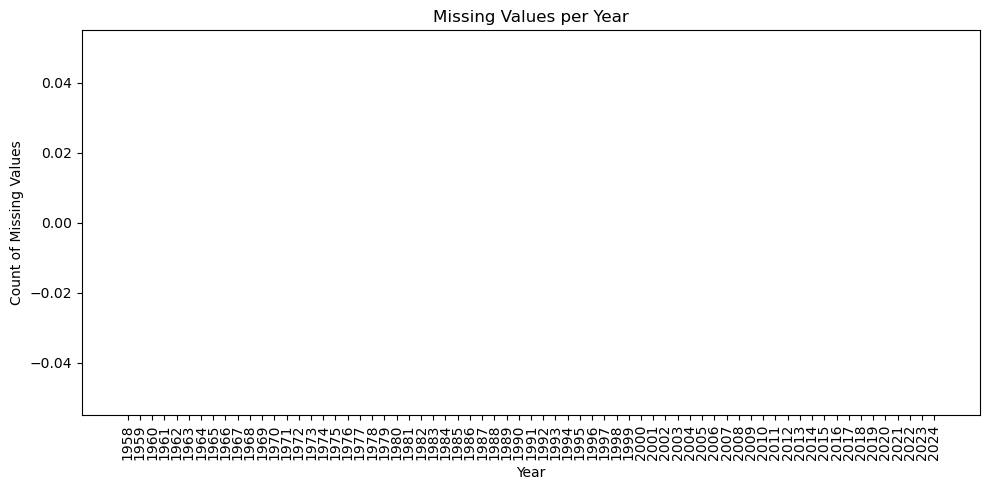

In [22]:
co2_concentration = asian_co2[asian_co2['Indicator']=='Monthly Atmospheric Carbon Dioxide Concentrations']
year_columns = [col for col in co2_concentration.columns if str(col).isdigit()]
missing_values = co2_concentration[year_columns].isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index.astype(str), missing_values.values, color='skyblue')
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Không có giá trị khuyết nào đối với chỉ số này

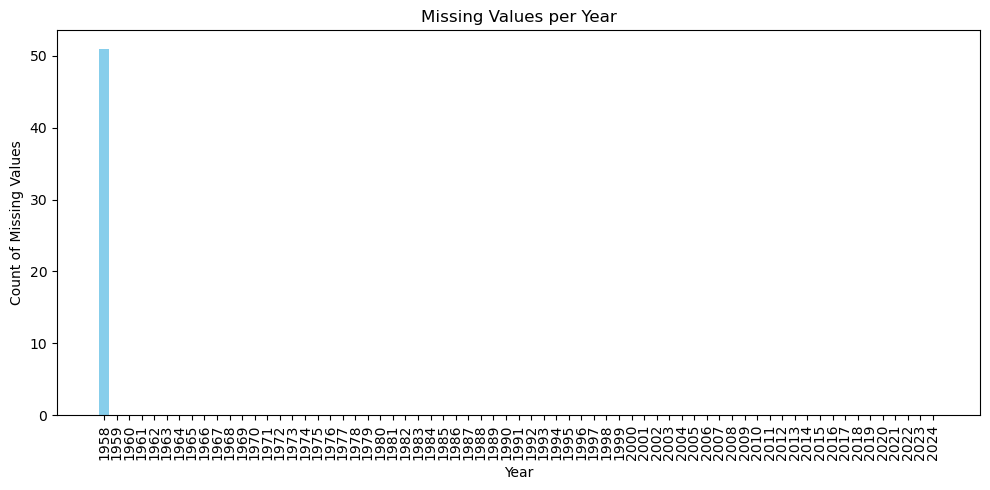

In [23]:
co2_percent = asian_co2[asian_co2['Indicator']=='Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change']
year_columns = [col for col in co2_percent.columns if str(col).isdigit()]
missing_values = co2_percent[year_columns].isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index.astype(str), missing_values.values, color='skyblue')
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Change in Mean Sea Levels

In [24]:
msl.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,D12/16/1992,10.11
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,D12/17/1992,32.73
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,D12/17/1992,-14.88
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,D12/17/1992,-9.76
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66


In [25]:
data = {
    'Pacific Ocean': ['PHL', 'IDN', 'MYS', 'KOR', 'JPN', 'TWN', 'CHN', 'SGP', 'PRK', 'VNM', 'KHM', 'BRN'],
    'Sea Japan': ['KOR', 'JPN', 'PRK'],
    'South China': ['TWN', 'CHN', 'VNM', 'KHM', 'PHL', 'BRN', 'IDN', 'MYS', 'SGP'],
    'Yellow Sea': ['KOR', 'JPN', 'PRK'],
    'Indian Ocean': ['IND', 'MMR', 'THA', 'IDN', 'MYS', 'OMN', 'IRN', 'PAK', 'YEM',
                         'IRQ', 'KWT', 'SAU', 'QAT', 'BHR', 'ARE', 'BGD', 'LKA', 'MDV'],
    'Andaman Sea': ['IND', 'MMR', 'THA', 'IDN', 'MYS'],
    'Arabian Sea': ['YEM', 'OMN', 'IRN', 'PAK', 'IND'],
    'Persian Gulf': ['IRN', 'PAK', 'IRQ', 'KWT', 'SAU', 'QAT', 'BHR', 'ARE', 'OMN'],
    'Bay Bengal': ['IND', 'BGD', 'MMR', 'THA', 'IDN', 'MYS', 'LKA'],
    'Atlantic Ocean': ['GEO', 'TUR'],
    'Mediterranean': ['TUR', 'CYP', 'SYR', 'LBN', 'ISR', 'PSE'],
    'Indonesian': ['IDN', 'IND', 'MMR', 'THA', 'MYS', 'PHL', 'TWN', 'CHN',
                        'VNM', 'KHM', 'BRN', 'SGP', 'TLS'],
    'North Pacific': ['JPN', 'KOR', 'TWN', 'CHN', 'PRK', 'PHL']
}

In [26]:
msl['Date'] = msl['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
msl['Date'] = msl['Date'].str.replace('D', '', regex=False)
msl['Date'] = pd.to_datetime(msl['Date'], format='%m/%d/%Y', errors='coerce')
msl['Year'] = msl['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
data_pivoted = msl.pivot_table(index=['Measure'], columns='Year', values='Value', aggfunc='mean')
data_pivoted = data_pivoted.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = msl[['Measure', 'Country', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
data_complete = pd.merge(additional_columns, data_pivoted, on='Measure', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
data_complete['Indicator'] = 'Change in mean sea level: Sea level'
data_unique = data_complete.drop_duplicates(subset=['Measure', 'Country', 'ISO3', 'Indicator', 'Unit', 'Source'])

data_unique.head()

,Measure,Country,ISO3,Indicator,Unit,Source,1992,1993,1994,1995,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Adriatic Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-4.32,-43.352353,-14.461176,-18.405484,...,41.870541,40.263000,5.071800,67.494595,48.928571,49.055676,43.623243,40.335890,67.538571,77.761429
6,Andaman Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-12.13,-11.821176,-45.074118,1.073125,...,46.638378,118.080429,48.602549,59.548378,9.718649,86.420556,128.116486,120.405676,32.191429,20.615714
12,Arabian Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,3.09,-1.883529,-1.110000,3.727500,...,76.339189,76.094143,66.067843,46.890811,81.558378,94.704865,92.790000,74.707568,88.901429,79.972857
18,Atlantic Ocean,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-12.31,-18.151176,-14.660000,-7.892258,...,45.719189,49.254000,54.032353,60.154865,68.727838,67.125946,73.136081,73.060405,80.109286,75.495714
24,Baltic Sea,World,WLD,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,216.55,-36.814706,-12.332353,25.759375,...,143.338378,56.301714,119.694902,34.972973,80.689189,176.454865,71.869054,126.682329,122.545000,191.640000


In [27]:
# Hàm tạo thêm các dòng mẫu với quốc gia tương ứng
def create_sample_rows(df, data):
    new_rows = []  # Danh sách chứa các dòng mẫu mới
    for sea, countries in data.items():
        for country in countries:
            # Sao chép các thông tin cột khác và thêm quốc gia mới cho mỗi đại dương
            new_row = df[df['Measure'] == sea].copy()  # Lọc các dòng có cùng 'sea'
            new_row['ISO3'] = country  # Thêm cột 'country' với giá trị quốc gia
            new_rows.append(new_row)

    # Nối các dòng mới vào DataFrame gốc
    new_df = pd.concat(new_rows, ignore_index=True)
    return new_df

In [28]:
# Cập nhật DataFrame với quốc gia mới
df_updated = create_sample_rows(data_unique, data)
df_updated.head()

,Measure,Country,ISO3,Indicator,Unit,Source,1992,1993,1994,1995,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Pacific Ocean,World,PHL,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-22.2,-18.485294,-12.876471,-10.025806,...,51.037838,55.17,53.094118,58.545946,63.616216,64.008378,68.667162,68.403649,77.200714,63.471429
1,Pacific Ocean,World,IDN,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-22.2,-18.485294,-12.876471,-10.025806,...,51.037838,55.17,53.094118,58.545946,63.616216,64.008378,68.667162,68.403649,77.200714,63.471429
2,Pacific Ocean,World,MYS,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-22.2,-18.485294,-12.876471,-10.025806,...,51.037838,55.17,53.094118,58.545946,63.616216,64.008378,68.667162,68.403649,77.200714,63.471429
3,Pacific Ocean,World,KOR,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-22.2,-18.485294,-12.876471,-10.025806,...,51.037838,55.17,53.094118,58.545946,63.616216,64.008378,68.667162,68.403649,77.200714,63.471429
4,Pacific Ocean,World,JPN,Change in mean sea level: Sea level,Millimeters,National Oceanic and Atmospheric Administratio...,-22.2,-18.485294,-12.876471,-10.025806,...,51.037838,55.17,53.094118,58.545946,63.616216,64.008378,68.667162,68.403649,77.200714,63.471429


In [81]:
asian_msl = pd.merge(df_updated, asian, how='right', on='ISO3')
asian_msl.columns

Index([  'Measure', 'Country_x',      'ISO3', 'Indicator',      'Unit',
          'Source',        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,        2014,        2015,
              2016,        2017,        2018,        2019,        2020,
              2021,        2022,        2023,        2024, 'Country_y'],
      dtype='object')

In [82]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_msl['Country_x'] = asian_msl['Country_y']
asian_msl = asian_msl.rename(columns={"Country_x": "Country"})
asian_msl = asian_msl.drop(['Country_y', 'Measure', 'Source'], axis=1, errors='ignore')
asian_msl

,Country,ISO3,Indicator,Unit,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Azerbaijan,AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bahrain,BHR,Change in mean sea level: Sea level,Millimeters,-19.32,-19.002353,-16.178824,-10.155484,-9.734706,-5.538182,...,56.091351,47.808000,51.532941,52.160000,62.378919,65.412703,63.429595,73.045811,77.902143,87.905714
4,Bahrain,BHR,Change in mean sea level: Sea level,Millimeters,103.73,-19.602353,1.106471,-1.301250,7.601212,7.270909,...,94.470000,64.178406,56.535769,51.748919,102.332703,126.046944,132.624189,97.157973,96.607857,32.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Viet Nam,VNM,Change in mean sea level: Sea level,Millimeters,-22.20,-18.485294,-12.876471,-10.025806,-5.076471,2.475758,...,51.037838,55.170000,53.094118,58.545946,63.616216,64.008378,68.667162,68.403649,77.200714,63.471429
109,Viet Nam,VNM,Change in mean sea level: Sea level,Millimeters,-14.28,-40.768235,-35.685882,-23.738065,-12.074118,-19.625455,...,32.544865,44.629571,71.411961,50.945676,57.397027,79.274054,91.480135,121.407162,92.136429,91.248571
110,Viet Nam,VNM,Change in mean sea level: Sea level,Millimeters,-14.98,-74.168235,-67.585882,-25.467500,23.382121,-71.078485,...,-14.887838,47.900143,87.428235,65.547027,15.320000,80.471892,140.947568,166.309589,82.240000,82.685714
111,Yemen,YEM,Change in mean sea level: Sea level,Millimeters,-19.32,-19.002353,-16.178824,-10.155484,-9.734706,-5.538182,...,56.091351,47.808000,51.532941,52.160000,62.378919,65.412703,63.429595,73.045811,77.902143,87.905714


In [83]:
#Điền khuyết giá trị nan trong cột 'Indicator' và 'Unit'
default_indicator = "Change in mean sea level: Sea level"
default_unit = "Millimeters"

asian_msl["Indicator"].fillna(default_indicator, inplace=True)
asian_msl["Unit"].fillna(default_unit, inplace=True)

#đối với các quốc gia không giáp biển thì giá trị bằng 0
asian_msl.replace(np.nan, 0, inplace=True)

In [84]:
# Gom nhóm theo các cột thông tin cơ bản và tính trung bình cho từng năm
asian_msl = asian_msl.groupby(["Country", "ISO3", "Indicator", "Unit"], as_index=False).mean(numeric_only=True)
asian_msl

,Country,ISO3,Indicator,Unit,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,Change in mean sea level: Sea level,Millimeters,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Armenia,ARM,Change in mean sea level: Sea level,Millimeters,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Azerbaijan,AZE,Change in mean sea level: Sea level,Millimeters,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bahrain,BHR,Change in mean sea level: Sea level,Millimeters,42.205000,-19.302353,-7.536176,-5.728367,-1.066747,0.866364,...,75.280676,55.993203,54.034355,51.954459,82.355811,95.729824,98.026892,85.101892,87.255000,60.197857
4,Bangladesh,BGD,Change in mean sea level: Sea level,Millimeters,-9.270000,-14.190588,-18.236176,-4.173679,-2.732656,-15.873788,...,61.355676,73.756643,56.956176,50.267432,54.199865,76.234730,95.747568,89.370440,67.737143,52.758571
5,Bhutan,BTN,Change in mean sea level: Sea level,Millimeters,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Brunei Darussalam,BRN,Change in mean sea level: Sea level,Millimeters,-17.153333,-44.473922,-38.716078,-19.743790,2.077178,-29.409394,...,22.898288,49.233238,70.644771,58.346216,45.444414,74.584775,100.364955,118.706800,83.859048,79.135238
7,Cambodia,KHM,Change in mean sea level: Sea level,Millimeters,-17.153333,-44.473922,-38.716078,-19.743790,2.077178,-29.409394,...,22.898288,49.233238,70.644771,58.346216,45.444414,74.584775,100.364955,118.706800,83.859048,79.135238
8,China,CHN,Change in mean sea level: Sea level,Millimeters,-12.750000,-36.933824,-29.566912,-17.561391,-0.983734,-22.969318,...,32.083986,52.657000,61.939363,60.880878,52.378851,77.209257,98.897432,111.655843,87.206429,72.230000
9,Cyprus,CYP,Change in mean sea level: Sea level,Millimeters,14.810000,-30.260588,-13.210588,-10.177500,12.687273,10.466061,...,18.720811,45.910571,19.756275,64.325135,50.568378,64.762162,59.696622,59.510411,82.732143,73.768571


In [85]:
asian_msl['Indicator'].unique()

array(['Change in mean sea level: Sea level'], dtype=object)

bộ dữ liệu chứa thông tn mô tả mực nước biển trung bình của các quốc gia, không có giá trị khuyết.

## Climate-related Disasters Frequency

In [34]:
asian_cdf = pd.merge(cdf, asian, on='ISO3')
asian_cdf.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Source',
       'Country_y'],
      dtype='object')

In [35]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_cdf['Country_x'] = asian_cdf['Country_y']
asian_cdf = asian_cdf.rename(columns={"Country_x": "Country"})
asian_cdf = asian_cdf.drop(['ObjectId', 'Country_y', 'ISO2', 'Source'], axis=1, errors='ignore')
asian_cdf

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0,2.0
3,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN
4,Afghanistan,AFG,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,State of Palestine,PSE,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
241,Yemen,YEM,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,3.0,5.0,2.0,3.0,1.0
242,Yemen,YEM,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,Yemen,YEM,"Climate related disasters frequency, Number of...",Number of,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0


In [36]:
asian_cdf['Indicator'].unique()

array(['Climate related disasters frequency, Number of Disasters: Drought',
       'Climate related disasters frequency, Number of Disasters: Extreme temperature',
       'Climate related disasters frequency, Number of Disasters: Flood',
       'Climate related disasters frequency, Number of Disasters: Landslide',
       'Climate related disasters frequency, Number of Disasters: Storm',
       'Climate related disasters frequency, Number of Disasters: TOTAL',
       'Climate related disasters frequency, Number of Disasters: Wildfire'],
      dtype=object)

Bộ dữ liệu Land and Carbon gồm 7 indicator thể hiện số lần xảy ra các thiên tai trong năm của từng quốc gia :
* Hạn hán
* Nhiệt độ cực đoan(sự gia tằng nhiệt độ mức tối đa)
* Lũ lụt
* Lở đất
* Bão
* TỔNG SỐ
* Cháy rừng

In [37]:
indicator_mapping = {
"Climate related disasters frequency, Number of Disasters: Drought": "Drought",
"Climate related disasters frequency, Number of Disasters: Extreme temperature": "Extreme temperature",
"Climate related disasters frequency, Number of Disasters: Flood": "Flood",
"Climate related disasters frequency, Number of Disasters: Landslide": "Landslide",
"Climate related disasters frequency, Number of Disasters: Storm": "Storm",
"Climate related disasters frequency, Number of Disasters: TOTAL": "TOTAL",
"Climate related disasters frequency, Number of Disasters: Wildfire": "Wildfire"
}

asian_cdf['Indicator'] = asian_cdf['Indicator'].replace(indicator_mapping)

In [38]:
asian_cdf.replace(np.nan, 0, inplace=True)
asian_cdf

,Country,ISO3,Indicator,Unit,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Drought,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Afghanistan,AFG,Extreme temperature,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Afghanistan,AFG,Flood,Number of,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0,2.0
3,Afghanistan,AFG,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
4,Afghanistan,AFG,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,State of Palestine,PSE,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
241,Yemen,YEM,Flood,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,3.0,5.0,2.0,3.0,1.0
242,Yemen,YEM,Landslide,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,Yemen,YEM,Storm,Number of,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


## Forest and Carbon

In [39]:
asian_fac = pd.merge(fac, asian, on='ISO3')
asian_fac.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1992', 'F1993',
       'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001',
       'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009',
       'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
       'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'Country_y'],
      dtype='object')

In [40]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_fac['Country_x'] = asian_fac['Country_y']
asian_fac = asian_fac.rename(columns={"Country_x": "Country"})
asian_fac = asian_fac.drop(['ObjectId', 'Country_y', 'ISO2', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1, errors='ignore')
asian_fac

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Afghanistan,AFG,Forest area,1000 HA,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,...,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000
1,Afghanistan,AFG,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,Afghanistan,AFG,Land area,1000 HA,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,...,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000
3,Afghanistan,AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
4,Armenia,ARM,Carbon stocks in forests,Million tonnes,15.948900,15.913300,15.877700,15.842100,15.806500,15.770900,...,15.392100,15.413400,15.434700,15.424900,15.415000,15.405200,15.395400,15.385500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Yemen,YEM,Forest area,1000 HA,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,...,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
270,Yemen,YEM,Index of carbon stocks in forests,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
271,Yemen,YEM,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
272,Yemen,YEM,Land area,1000 HA,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,...,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000,52797.000000


In [41]:
asian_fac['Indicator'].unique()

array(['Forest area', 'Index of forest extent', 'Land area',
       'Share of forest area', 'Carbon stocks in forests',
       'Index of carbon stocks in forests'], dtype=object)

Bộ dữ liệu Land and Carbon gồm 6 indicator, trong đó nhóm sử dụng 22 chỉ số sau cho việc phân tích thăm dò:
* **Share of forest area:** Tỉ lệ diện tích rừng trên tổng diện tích đất 
* **Index of forest extent:** Chỉ số diện tích rừng cho thấy quy mô của diện tích rừng trong một năm nhất định, so với năm gốc 1992(100).

Các chỉ số còn lại trong bộ dữ liệu:
* **Land Area:** Tổng diện tích đất
* **Forest Area:** Tổng diện tích rừng
* **Carbon stocks in forests :** Trữ lượng cac-bon trong rừng
* **Index of carbon stocks in forests:** Chỉ số cho thấy trữ lượng cac-bon trong sinh khối sống trong rừng của một năm nhất định so với năm cơ sở 1992(100).

In [42]:
asian_fac = asian_fac[asian_fac['Indicator'].isin(['Index of forest extent', 'Share of forest area'])]
asian_fac

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,Afghanistan,AFG,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3,Afghanistan,AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
7,Armenia,ARM,Index of forest extent,Index,100.000000,99.937484,99.874967,99.812451,99.749934,99.687418,...,98.691043,98.628826,98.566608,98.503793,98.440977,98.378162,98.315346,98.252531,98.189715,98.126899
9,Armenia,ARM,Share of forest area,Percent,11.742606,11.735265,11.727924,11.720583,11.713242,11.705901,...,11.588901,11.581595,11.574289,11.566913,11.559536,11.552160,11.544784,11.537408,11.530032,11.522655
11,Azerbaijan,AZE,Index of forest extent,Index,100.000000,100.445640,100.891280,101.336920,101.782560,102.228200,...,111.171840,112.124227,113.076615,114.082473,115.101066,116.310651,117.519691,118.729255,119.938473,121.147921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Viet Nam,VNM,Share of forest area,Percent,30.285379,31.025230,31.765080,32.504931,33.244782,33.984632,...,44.063952,44.442849,44.871164,45.878355,45.996337,46.234682,46.476842,46.719002,46.961162,47.203322
265,State of Palestine,PSE,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,110.837004,111.255507,111.674009,111.674009,111.674009,111.674009,111.674009,111.674009,111.674009,111.674009
267,State of Palestine,PSE,Share of forest area,Percent,1.508306,1.508306,1.508306,1.508306,1.508306,1.508306,...,1.671761,1.678073,1.684385,1.684385,1.684385,1.684385,1.684385,1.684385,1.682988,1.682988
271,Yemen,YEM,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [43]:
idx_forest_land = asian_fac[asian_fac['Indicator']=='Index of forest extent']
idx_forest_land

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,Afghanistan,AFG,Index of forest extent,Index,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
7,Armenia,ARM,Index of forest extent,Index,100.0,99.937484,99.874967,99.812451,99.749934,99.687418,...,98.691043,98.628826,98.566608,98.503793,98.440977,98.378162,98.315346,98.252531,98.189715,98.126899
11,Azerbaijan,AZE,Index of forest extent,Index,100.0,100.445640,100.891280,101.336920,101.782560,102.228200,...,111.171840,112.124227,113.076615,114.082473,115.101066,116.310651,117.519691,118.729255,119.938473,121.147921
15,Bahrain,BHR,Index of forest extent,Index,100.0,106.000000,112.000000,118.000000,124.000000,130.000000,...,227.200000,233.600000,240.000000,248.000000,256.000000,264.000000,272.000000,280.000000,288.000000,296.000000
21,Bangladesh,BGD,Index of forest extent,Index,100.0,99.999990,99.999979,99.999969,99.999964,99.999953,...,98.179854,98.128384,98.076913,98.076913,98.076913,98.076913,98.076913,98.076913,98.076913,98.076913
27,Bhutan,BTN,Index of forest extent,Index,100.0,100.392943,100.785886,101.178829,101.571771,101.964714,...,107.308231,107.386518,107.464806,107.543173,107.621540,107.699907,107.778274,107.856641,107.935008,108.013375
33,Brunei Darussalam,BRN,Index of forest extent,Index,100.0,99.609566,99.219131,98.828697,98.438263,98.047828,...,92.728160,92.728160,92.728160,92.728160,92.728160,92.728160,92.728160,92.728160,92.728160,92.728160
39,Cambodia,KHM,Index of forest extent,Index,100.0,99.795813,99.591625,99.387438,99.183251,98.979063,...,87.078067,83.898496,80.718925,79.298400,77.877875,76.457350,75.036825,73.616300,72.195775,70.775250
45,China,CHN,Index of forest extent,Index,100.0,101.232676,102.465352,103.698028,104.930704,106.163380,...,128.122025,129.324149,130.526274,131.870438,133.037077,134.203696,135.370315,136.536934,137.703553,138.870172
51,Cyprus,CYP,Index of forest extent,Index,100.0,100.643343,101.286686,101.930029,102.573372,103.216715,...,105.852583,105.836652,105.820722,105.759451,105.747197,105.734943,105.722689,105.710434,105.698180,105.685926


In [44]:
idx_forest_land['Country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic',
       'Tajikistan', 'Thailand', 'Timor-Leste', 'Türkiye', 'Turkmenistan',
       'United Arab Emirates', 'Uzbekistan', 'Viet Nam',
       'State of Palestine', 'Yemen'], dtype=object)

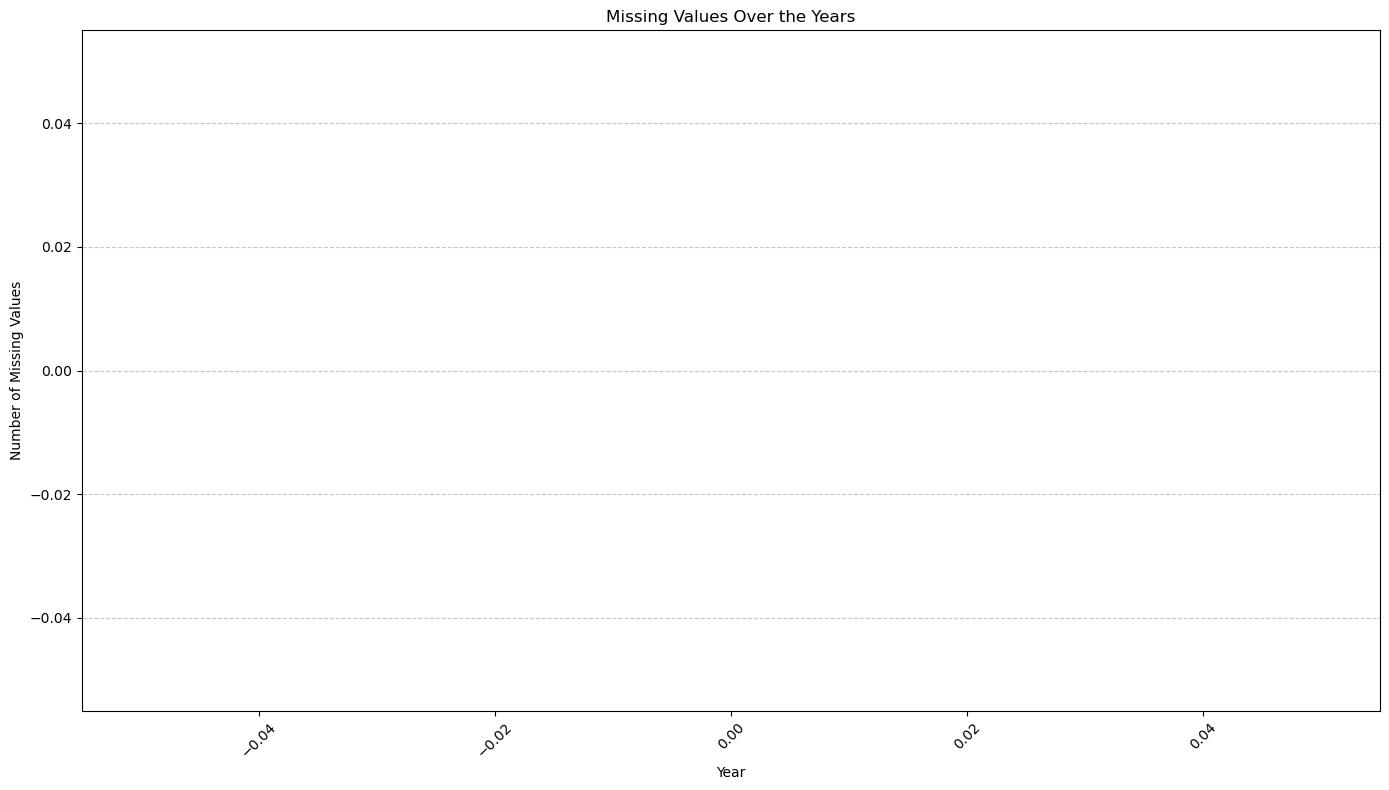

In [45]:
visualize_missing_values(idx_forest_land)

Đối với chỉ số *'Index of forest extent'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của các quốc gia Hong Kong, Macao, State of Palestine và Taiwan.

In [46]:
shared_area = asian_fac[asian_fac['Indicator']=='Share of forest area']
shared_area

,Country,ISO3,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
3,Afghanistan,AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
9,Armenia,ARM,Share of forest area,Percent,11.742606,11.735265,11.727924,11.720583,11.713242,11.705901,...,11.588901,11.581595,11.574289,11.566913,11.559536,11.552160,11.544784,11.537408,11.530032,11.522655
13,Azerbaijan,AZE,Share of forest area,Percent,11.454823,11.505870,11.556917,11.607965,11.659012,11.710059,...,12.820504,12.929709,13.039534,13.154412,13.273146,13.413930,13.553367,13.694190,13.832991,13.972482
17,Bahrain,BHR,Share of forest area,Percent,0.352113,0.373239,0.394366,0.415493,0.436620,0.457746,...,0.737662,0.757458,0.771208,0.795892,0.820513,0.848329,0.871795,0.891720,0.911392,0.936709
23,Bangladesh,BGD,Share of forest area,Percent,14.752474,14.752473,14.752471,14.752470,14.752469,14.752468,...,14.483958,14.476365,14.468772,14.468772,14.468772,14.468772,14.468772,14.468772,14.468772,14.468772
29,Bhutan,BTN,Share of forest area,Percent,54.075637,54.288124,63.980704,64.230151,64.479598,64.729045,...,71.128998,71.180890,71.232783,71.234270,71.286179,71.345569,71.397483,71.449397,71.501311,71.553225
35,Brunei Darussalam,BRN,Share of forest area,Percent,77.760911,77.457306,77.153700,76.850095,76.546490,76.242884,...,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262,72.106262
41,Cambodia,KHM,Share of forest area,Percent,62.089463,61.962684,61.835905,61.709126,61.582348,61.455569,...,54.066304,52.092126,50.117947,49.235951,48.353954,47.471958,46.589961,45.707965,44.825969,43.943972
47,China,CHN,Share of forest area,Percent,17.161088,17.372628,17.584169,17.795728,18.007288,18.218830,...,21.987224,22.193523,22.399821,22.630498,22.830707,23.030912,23.231118,23.431323,23.631528,23.831734
53,Cyprus,CYP,Share of forest area,Percent,17.663420,17.777056,17.890693,18.004329,18.117965,18.231602,...,18.697186,18.694372,18.691558,18.680736,18.678571,18.676407,18.674242,18.672078,18.669913,18.667749


In [47]:
shared_area['Country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Türkiye', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
       'Viet Nam', 'State of Palestine', 'Yemen'], dtype=object)

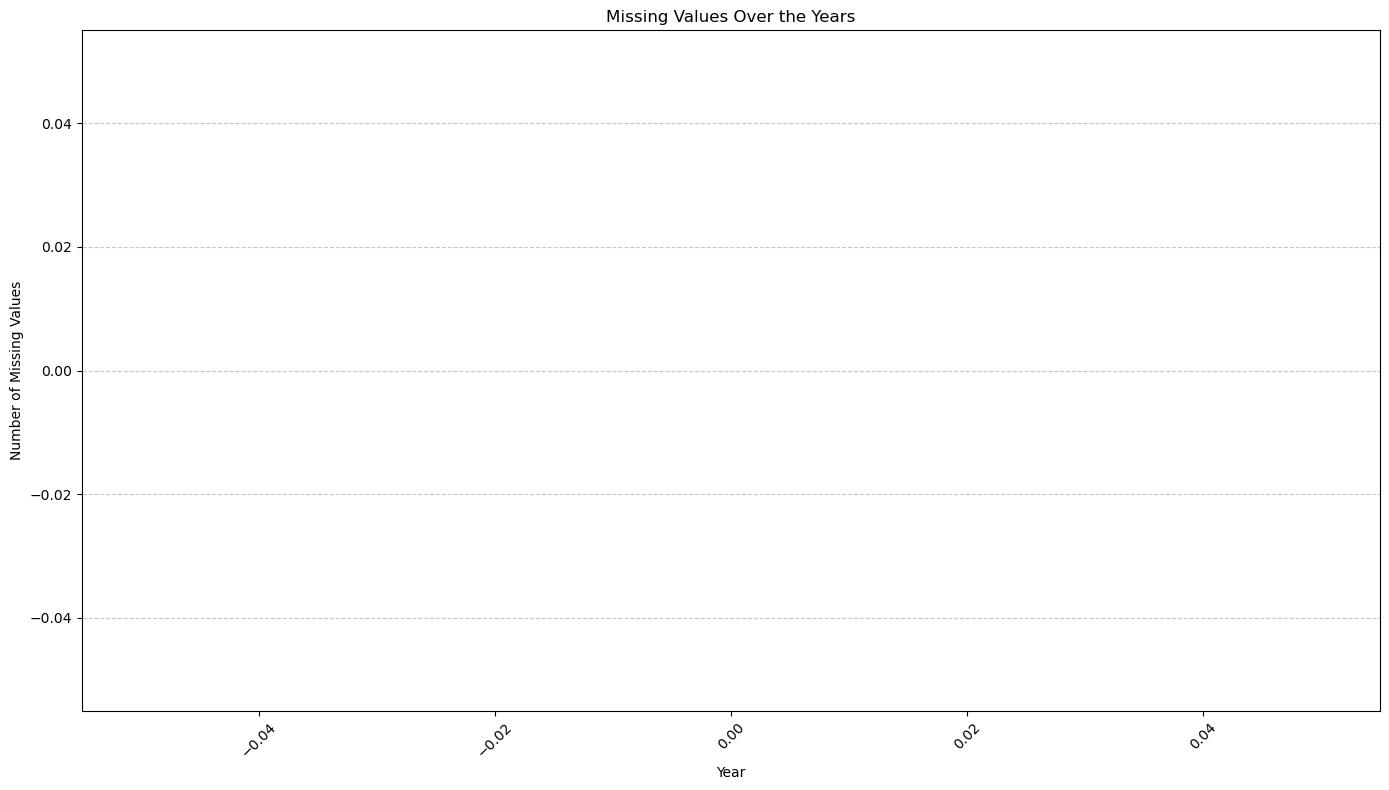

In [48]:
visualize_missing_values(shared_area)

Đối với chỉ số *'Share of forest area'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của các quốc gia Hong Kong, Macao và Taiwan.

## Lọc và tạo bộ dữ liệu cuối cùng

In [49]:
def preprocess_finaldata(df, output_path):
    '''
    Sau khi xem xét các phân tích và giá trị của dữ liệu .Nhóm lựa chọn giữ lại dữ liệu trong khoảng 2018-2022 làm dữ liệu phân tích chính.
    Trong đó các thuộc tính ['Country', 'ISO3', 'Indicator','Unit' được giữ lại cho bộ dữ liệu cuối cùng này.
    '''

    df = df[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020', '2021', '2022']]
    
    df.to_csv(output_path, index=False)

    # Return the preprocessed DataFrame
    return df

In [88]:
# lưu lại các bộ dữ liệu đã xử lý cơ bản

path = '../data/preprecessed_data/asian_ast.csv'
preprocess_finaldata(asian_ast, path)

path = '../data/preprecessed_data/asian_fac.csv'
asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)
preprocess_finaldata(asian_fac, path)

path = '../data/preprecessed_data/asian_cdf.csv'
preprocess_finaldata(asian_cdf, path)

path = '../data/preprecessed_data/asian_msl.csv'
asian_msl = asian_msl[['Country', 'ISO3', 'Indicator', 'Unit', 2018, 2019, 2020, 2021, 2022]]
asian_msl.to_csv(path, index=False)

path = '../data/preprecessed_data/asian_co2.csv'
asian_co2 = asian_co2[['Country', 'ISO3', 'Indicator', 'Unit', 2018, 2019, 2020, 2021, 2022]]
asian_co2.to_csv(path, index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15140\886341277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)


In [89]:
asian_ast = pd.read_csv('../data/preprecessed_data/asian_ast.csv')
asian_cdf = pd.read_csv('../data/preprecessed_data/asian_cdf.csv')
asian_co2 = pd.read_csv('../data/preprecessed_data/asian_co2.csv')
asian_fac = pd.read_csv('../data/preprecessed_data/asian_fac.csv')
asian_msl = pd.read_csv('../data/preprecessed_data/asian_msl.csv')

In [90]:
# Nối các DataFrame lại với nhau
df_final = pd.concat([asian_ast, asian_cdf, asian_co2, asian_fac, asian_msl], axis=0, ignore_index=True)
df_final

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,Afghanistan,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1.624000,0.991000,0.587000,1.475000,2.154000
1,Armenia,ARM,Temperature change with respect to a baseline ...,Degree Celsius,2.739000,1.864000,1.954000,2.183000,1.845000
2,Azerbaijan,AZE,Temperature change with respect to a baseline ...,Degree Celsius,2.131000,1.878000,1.889000,1.958000,2.029000
3,Bahrain,BHR,Temperature change with respect to a baseline ...,Degree Celsius,2.280000,2.127000,1.989000,2.421000,1.971000
4,Bangladesh,BGD,Temperature change with respect to a baseline ...,Degree Celsius,0.911000,1.151000,0.934000,1.326000,1.240000
...,...,...,...,...,...,...,...,...,...
539,Türkiye,TUR,Change in mean sea level: Sea level,Millimeters,62.240000,59.648108,65.944054,66.416351,66.285408
540,United Arab Emirates,ARE,Change in mean sea level: Sea level,Millimeters,51.954459,82.355811,95.729824,98.026892,85.101892
541,Uzbekistan,UZB,Change in mean sea level: Sea level,Millimeters,0.000000,0.000000,0.000000,0.000000,0.000000
542,Viet Nam,VNM,Change in mean sea level: Sea level,Millimeters,58.346216,45.444414,74.584775,100.364955,118.706800


In [92]:
df_final['Indicator'].value_counts()

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    51
Monthly Atmospheric Carbon Dioxide Concentrations                                                   51
Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change                   51
Change in mean sea level: Sea level                                                                 51
TOTAL                                                                                               49
Share of forest area                                                                                48
Index of forest extent                                                                              47
Flood                                                                                               46
Storm                                                                                               42
Drought                                                        

In [93]:
df_final.to_csv('../data/preprecessed_data/final_data.csv', index=False)